In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

In [2]:
# get datasets
df_app_record = pd.read_csv('/Users/fneba/application_record (1).csv')
df_credit_record = pd.read_csv('/Users/fneba/credit_record (1).csv')

In [3]:
df_credit_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [4]:
df_app_record.shape, df_credit_record.shape

((438557, 18), (1048575, 3))

In [5]:
len(df_app_record['ID'].unique()), len(df_credit_record['ID'].unique())

(438510, 45985)

In [6]:
df_app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Data Analysis on CreditRecord

* 0: 1-29 days past due
* 1: 30-59 days past due
* 2: 60-89 days overdue
* 3: 90-119 days overdue
* 4: 120-149 days overdue
* 5: Overdue or bad debts, write-offs for more than 150 days
* c: paid off that month
* x: No loan for the month

In [8]:
# Status
df_credit_record['STATUS'] = df_credit_record['STATUS'].replace({'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, 'C': 1, 'X': 0})
df_credit_record['STATUS'].value_counts()

0    606544
1    442031
Name: STATUS, dtype: int64

In [9]:
df_credit_record['STATUS'] = df_credit_record['STATUS'].astype('int')
df_credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [10]:
# credit history months
months_bal_df = abs(df_credit_record.groupby('ID')['MONTHS_BALANCE'].min().reset_index())
months_bal_df.rename(columns={'MONTHS_BALANCE':'CREDIT_HISTORY_MONTHS'}, inplace=True)
months_bal_df.head()

,ID,CREDIT_HISTORY_MONTHS
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [11]:
ID_df = df_credit_record.groupby('ID')['STATUS'].apply(pd.Series.mode).reset_index()
ID_df = ID_df[ID_df['level_1']==0]
ID_df.drop(columns='level_1', inplace=True)
ID_df.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [12]:
months_bal_df.shape, ID_df.shape

((45985, 2), (45985, 2))

In [13]:
df_credit_record = months_bal_df.merge(ID_df, how='inner', on='ID')
df_credit_record.shape
df_credit_record.to_csv("temp.csv", index=False)

In [14]:
df_credit_record['STATUS'].value_counts()

0    30063
1    15922
Name: STATUS, dtype: int64

In [15]:
print(df_credit_record.shape)

(45985, 3)


In [16]:
# merge both datasets
df = df_app_record.merge(df_credit_record, how='inner', on='ID')
df.shape

(36457, 20)

In [17]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


# Exploratory Data Analysis

In [18]:
#check for any duplicate ID's
df['duplicate_IDs'] = df.duplicated('ID')

In [19]:
df['duplicate_IDs'].value_counts()

False    36457
Name: duplicate_IDs, dtype: int64

In [20]:
df.drop(columns='duplicate_IDs', inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [21]:
#check for nulls in merge data
df.isnull().sum()

ID                           0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
CNT_CHILDREN                 0
AMT_INCOME_TOTAL             0
NAME_INCOME_TYPE             0
NAME_EDUCATION_TYPE          0
NAME_FAMILY_STATUS           0
NAME_HOUSING_TYPE            0
DAYS_BIRTH                   0
DAYS_EMPLOYED                0
FLAG_MOBIL                   0
FLAG_WORK_PHONE              0
FLAG_PHONE                   0
FLAG_EMAIL                   0
OCCUPATION_TYPE          11323
CNT_FAM_MEMBERS              0
CREDIT_HISTORY_MONTHS        0
STATUS                       0
dtype: int64

In [22]:
#drop OCCUPATION_TYPE column because of nulls(more than 50%)
df.drop(columns='OCCUPATION_TYPE', inplace=True)

In [23]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,26,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     36457 non-null  int64  
 1   CODE_GENDER            36457 non-null  object 
 2   FLAG_OWN_CAR           36457 non-null  object 
 3   FLAG_OWN_REALTY        36457 non-null  object 
 4   CNT_CHILDREN           36457 non-null  int64  
 5   AMT_INCOME_TOTAL       36457 non-null  float64
 6   NAME_INCOME_TYPE       36457 non-null  object 
 7   NAME_EDUCATION_TYPE    36457 non-null  object 
 8   NAME_FAMILY_STATUS     36457 non-null  object 
 9   NAME_HOUSING_TYPE      36457 non-null  object 
 10  DAYS_BIRTH             36457 non-null  int64  
 11  DAYS_EMPLOYED          36457 non-null  int64  
 12  FLAG_MOBIL             36457 non-null  int64  
 13  FLAG_WORK_PHONE        36457 non-null  int64  
 14  FLAG_PHONE             36457 non-null  int64  
 15  FL

In [25]:
# Convert DAYS_BIRTH & DAYS_EMPLOYED  into years
df['AGE'] = np.abs(df['DAYS_BIRTH']/365).astype('int')
df['YEARS_EMPLOYED'] = np.abs(df['DAYS_EMPLOYED']/365).astype('int')

df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

In [26]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2.0,15,1,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2.0,14,1,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,0,52,8


In [27]:
# Converting Categorical binary values to numeric binary values
df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 0, 'F': 1})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2.0,15,1,32,12
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2.0,14,1,32,12
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,0,58,3
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,0,52,8
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,0,52,8


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     36457 non-null  int64  
 1   CODE_GENDER            36457 non-null  int64  
 2   FLAG_OWN_CAR           36457 non-null  int64  
 3   FLAG_OWN_REALTY        36457 non-null  int64  
 4   CNT_CHILDREN           36457 non-null  int64  
 5   AMT_INCOME_TOTAL       36457 non-null  float64
 6   NAME_INCOME_TYPE       36457 non-null  object 
 7   NAME_EDUCATION_TYPE    36457 non-null  object 
 8   NAME_FAMILY_STATUS     36457 non-null  object 
 9   NAME_HOUSING_TYPE      36457 non-null  object 
 10  FLAG_MOBIL             36457 non-null  int64  
 11  FLAG_WORK_PHONE        36457 non-null  int64  
 12  FLAG_PHONE             36457 non-null  int64  
 13  FLAG_EMAIL             36457 non-null  int64  
 14  CNT_FAM_MEMBERS        36457 non-null  float64
 15  CR

In [29]:
# Converting float values to int
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype('int')
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('int')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2,15,1,32,12
1,5008805,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2,14,1,32,12
2,5008806,0,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,0,58,3
3,5008808,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,0,52,8
4,5008809,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,0,52,8


# Visualization

In [30]:
df['STATUS'].value_counts(normalize=True)*100

0    66.261623
1    33.738377
Name: STATUS, dtype: float64

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2,15,1,32,12
1,5008805,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2,14,1,32,12
2,5008806,0,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,0,58,3
3,5008808,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,0,52,8
4,5008809,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,0,52,8


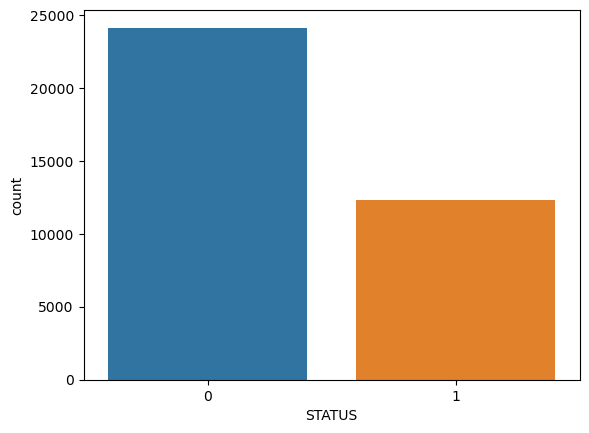

In [31]:
# Checking how target classes are distributed
sns.countplot(df, x='STATUS')

df.head()

The graphs tells that taken dataset is biased

<Axes: xlabel='CODE_GENDER', ylabel='count'>

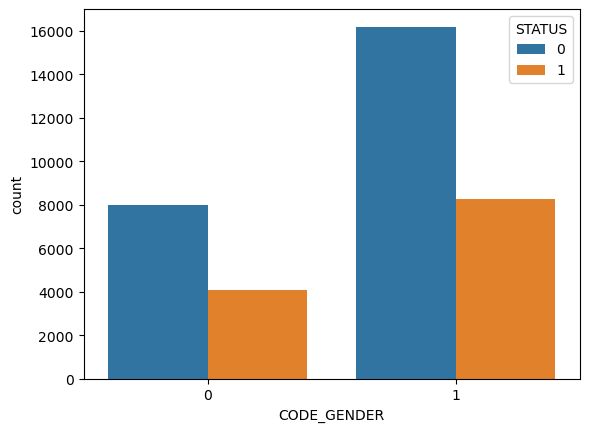

In [32]:
sns.countplot(data=df, x='CODE_GENDER', hue='STATUS')

we can see in above graph that approval rate is heigher for male and female

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

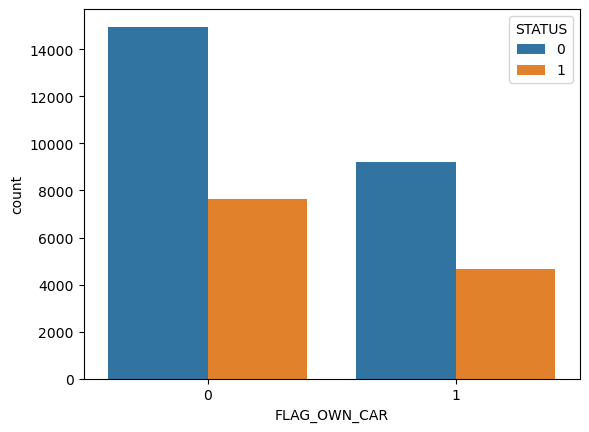

In [33]:
sns.countplot(data=df, x='FLAG_OWN_CAR', hue='STATUS')

Male has more cars than female also apples for approval rate

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

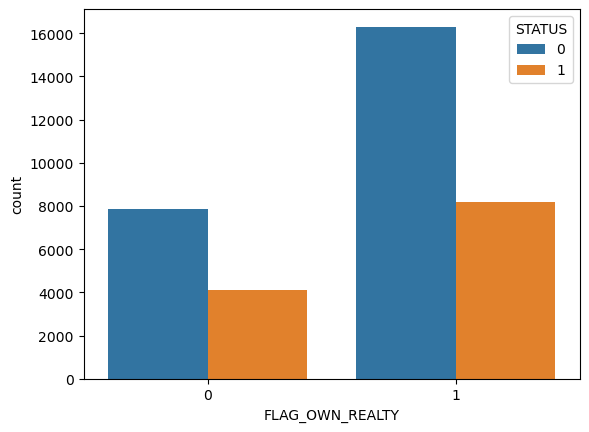

In [34]:
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='STATUS')

<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

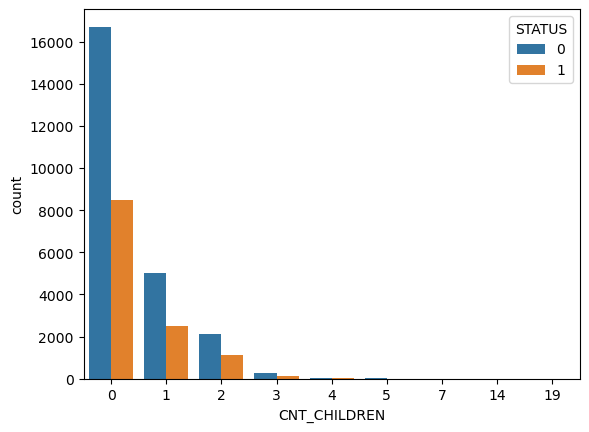

In [35]:
sns.countplot(data=df, x='CNT_CHILDREN', hue='STATUS')

Above graph represents, no.of childern count wrt approval rate

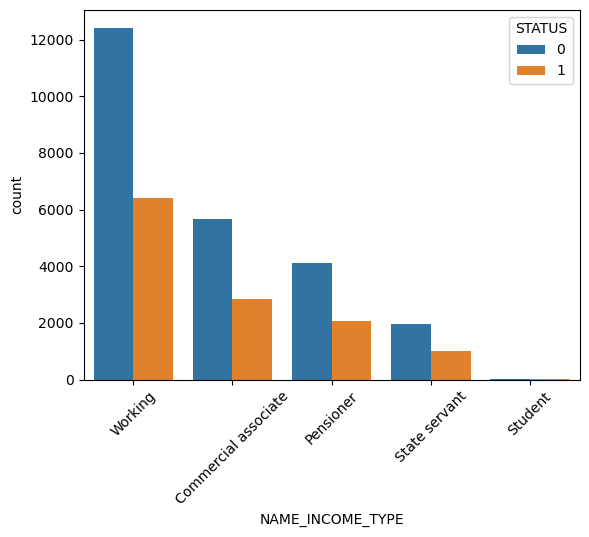

In [36]:
sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='STATUS')
plt.xticks(rotation=45)
plt.show()

we can see people who are working are having higher approval rate than others

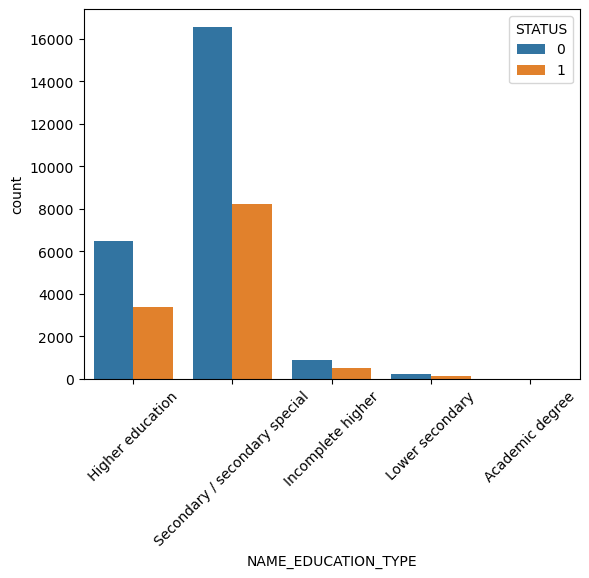

In [37]:
sns.countplot(data=df, x='NAME_EDUCATION_TYPE', hue='STATUS')
plt.xticks(rotation=45)
plt.show()

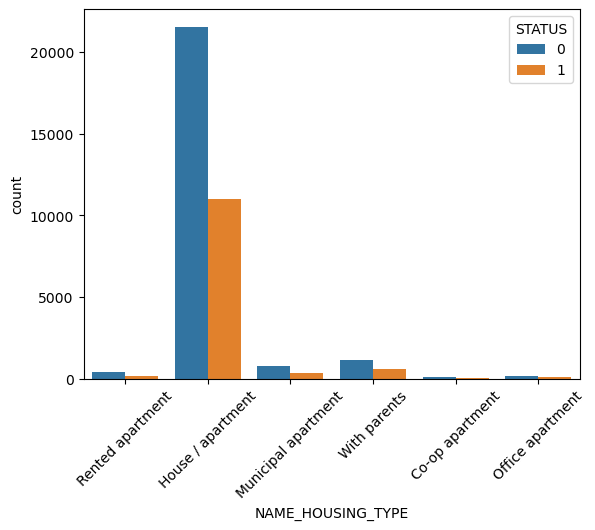

In [38]:
sns.countplot(data=df, x='NAME_HOUSING_TYPE', hue='STATUS')
plt.xticks(rotation=45)
plt.show()

people with who own house/apartment have high approval rate

<Axes: xlabel='FLAG_MOBIL', ylabel='count'>

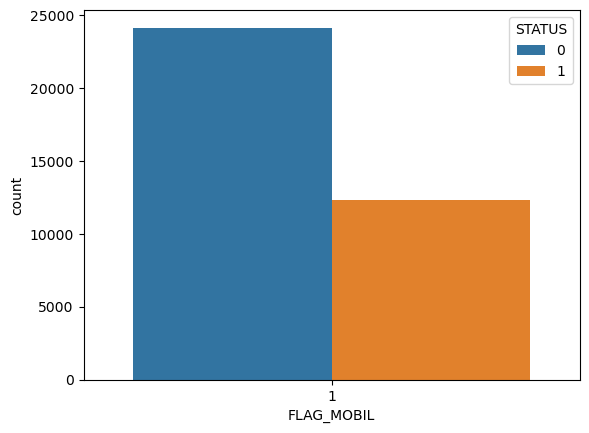

In [39]:
sns.countplot(data=df, x='FLAG_MOBIL', hue='STATUS')

<Axes: xlabel='FLAG_WORK_PHONE', ylabel='count'>

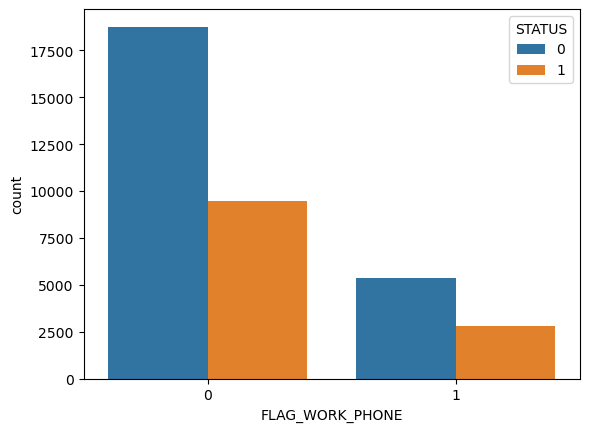

In [40]:
sns.countplot(data=df, x='FLAG_WORK_PHONE', hue='STATUS')

<Axes: xlabel='FLAG_PHONE', ylabel='count'>

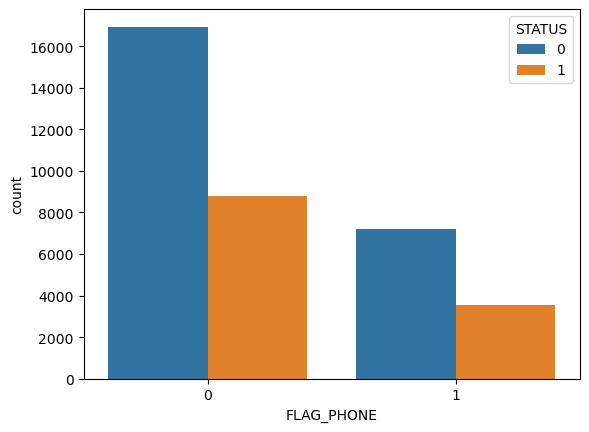

In [41]:
sns.countplot(data=df, x='FLAG_PHONE', hue='STATUS')

<Axes: xlabel='FLAG_EMAIL', ylabel='count'>

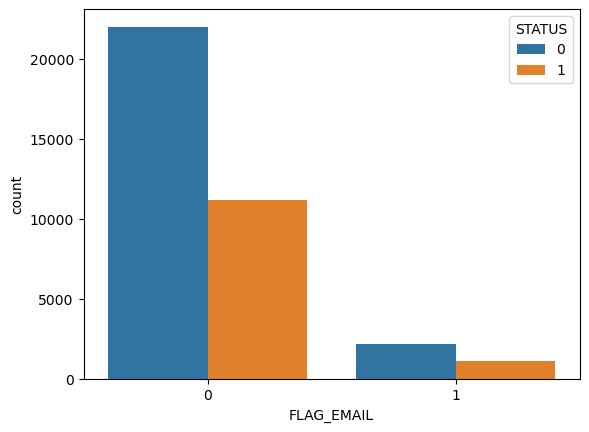

In [42]:
sns.countplot(data=df, x='FLAG_EMAIL', hue='STATUS')

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='count'>

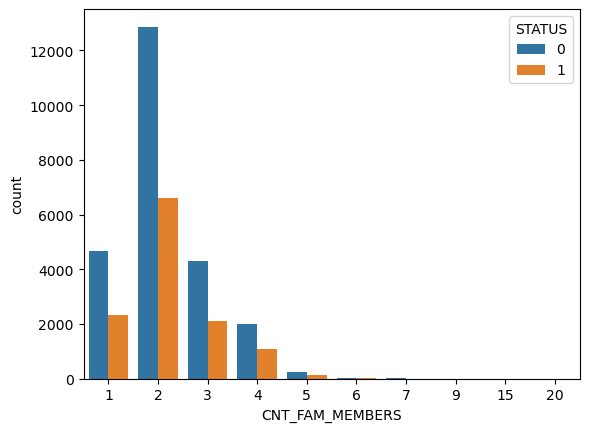

In [43]:
sns.countplot(data=df, x='CNT_FAM_MEMBERS', hue='STATUS')

Family containing 2 people have higher approval rate

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

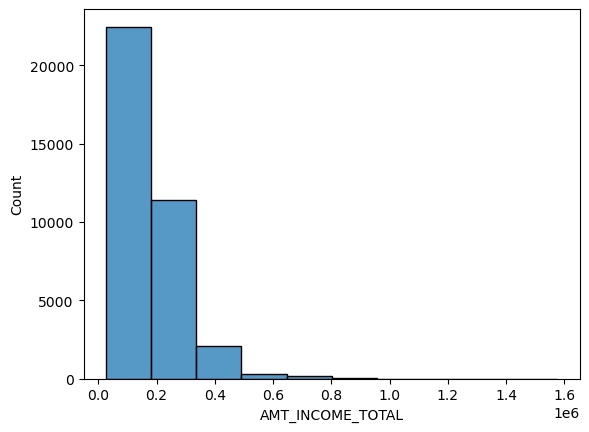

In [44]:
sns.histplot(data=df, x='AMT_INCOME_TOTAL', bins=10)

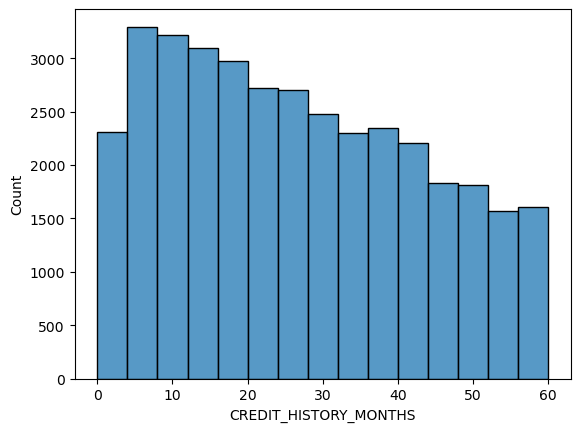

In [45]:
sns.histplot(data=df, x='CREDIT_HISTORY_MONTHS', bins=15)
plt.show()

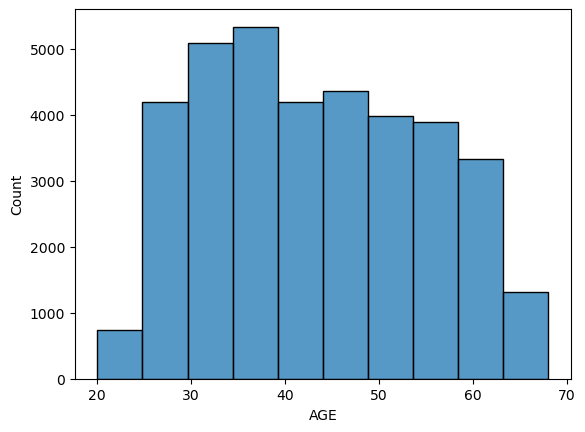

In [46]:
sns.histplot(data=df, x='AGE', bins=10)
plt.show()

# One Hot Encoding
* It's a technique used to convert categorical variables into numerical format, which helps in improve prediction accuracy

In [47]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2,15,1,32,12
1,5008805,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2,14,1,32,12
2,5008806,0,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,0,58,3
3,5008808,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,0,52,8
4,5008809,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,0,52,8


In [48]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

In [49]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [50]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [51]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
# List of categorical columns
onehot_encode_cols = ['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE']

# Define a dictionary to map values to numeric values
value_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

# Replace values in the DataFrame
for col in onehot_encode_cols:
    df[col] = df[col].replace(value_mapping)

# Perform one-hot encoding on the specified columns
df = pd.get_dummies(df, columns=onehot_encode_cols)

df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_HISTORY_MONTHS,STATUS,AGE,YEARS_EMPLOYED,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_EDUCATION_TYPE_4
0,5008804,0,1,1,0,427500,1,1,0,0,2,15,1,32,12,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,5008805,0,1,1,0,427500,1,1,0,0,2,14,1,32,12,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,5008806,0,1,1,0,112500,1,0,0,0,2,29,0,58,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,5008808,1,0,1,0,270000,1,0,1,1,1,4,0,52,8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,5008809,1,0,1,0,270000,1,0,1,1,1,26,0,52,8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [54]:
df['STATUS'].value_counts()

0    24157
1    12300
Name: STATUS, dtype: int64

In [55]:
df.shape

(36457, 36)

In [56]:
correlation_matrix = df[['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CREDIT_HISTORY_MONTHS']].corr()

print(correlation_matrix)


                       AMT_INCOME_TOTAL       AGE  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL               1.000000 -0.067715       -0.168037   
AGE                           -0.067715  1.000000        0.624223   
YEARS_EMPLOYED                -0.168037  0.624223        1.000000   
CNT_FAM_MEMBERS                0.023750 -0.303887       -0.222561   
CREDIT_HISTORY_MONTHS          0.017494  0.053939       -0.006726   

                       CNT_FAM_MEMBERS  CREDIT_HISTORY_MONTHS  
AMT_INCOME_TOTAL              0.023750               0.017494  
AGE                          -0.303887               0.053939  
YEARS_EMPLOYED               -0.222561              -0.006726  
CNT_FAM_MEMBERS               1.000000               0.020926  
CREDIT_HISTORY_MONTHS         0.020926               1.000000  


<Axes: >

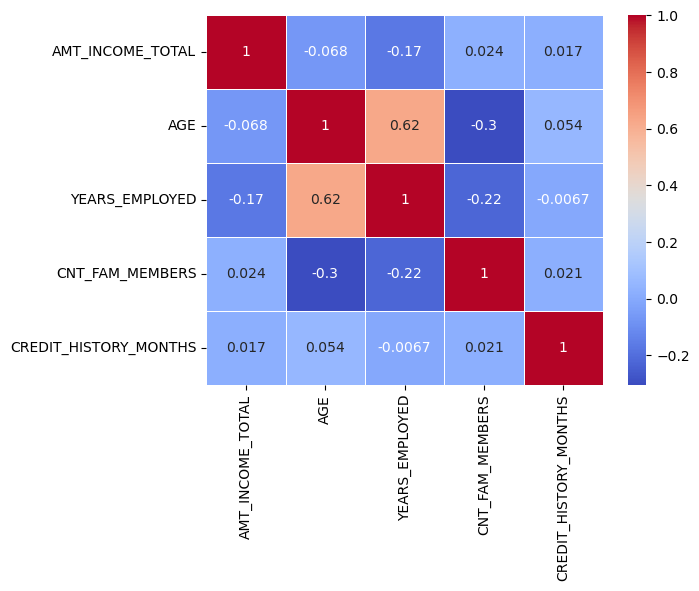

In [57]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

Age & years employed are positively correlated

# Train Test Split

In [58]:
# First take samples so that the Data is balanced
approved = df[df['STATUS'] == 1]
unApproved = df[df['STATUS'] == 0]

approved_sample = approved.sample(10000)

unApproved_sample = unApproved.sample(10000)

bigSampleArr = [approved_sample, unApproved_sample]

bigSample = pd.concat(bigSampleArr)
bigSample = bigSample.sort_values(by=['ID'])
bigSample

# Set bigSample to df
df = bigSample

In [59]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ID', 'CODE_GENDER', 'STATUS'])
y = df['STATUS']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# fit scaler on training data
# scaler = MinMaxScaler().fit(X_train)
scaler = StandardScaler().fit(X_train)

# transform training data
X_train_scaled = scaler.transform(X_train)

# transform testing dataabs
X_test_scaled = scaler.transform(X_test)

In [62]:
X_train_scaled.shape, X_test_scaled.shape

((16000, 33), (4000, 33))

In [63]:
y_train.shape, y_test.shape

((16000,), (4000,))

In [64]:
y_train.value_counts(normalize=True)*100

1    50.00625
0    49.99375
Name: STATUS, dtype: float64

# Modeling

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6425
Confusion Matrix:
[[1117  884]
 [ 546 1453]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      2001
           1       0.62      0.73      0.67      1999

    accuracy                           0.64      4000
   macro avg       0.65      0.64      0.64      4000
weighted avg       0.65      0.64      0.64      4000



# Naive bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6575
Confusion Matrix:
[[1278  723]
 [ 647 1352]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2001
           1       0.65      0.68      0.66      1999

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



# XG Boost

In [68]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
# train_predict = model.predict(xTrain)
y_pred = model.predict(X_test_scaled)

# train_acc = accuracy_score(yTrain, train_predict)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6815
Confusion Matrix:
[[1209  792]
 [ 482 1517]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      2001
           1       0.66      0.76      0.70      1999

    accuracy                           0.68      4000
   macro avg       0.69      0.68      0.68      4000
weighted avg       0.69      0.68      0.68      4000



# KNN

In [69]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.65225
Confusion Matrix:
[[1211  790]
 [ 601 1398]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.61      0.64      2001
           1       0.64      0.70      0.67      1999

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



# Random Forest

In [70]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.696
Confusion Matrix:
[[1382  619]
 [ 597 1402]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      2001
           1       0.69      0.70      0.70      1999

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



# Decision Tree

In [71]:
dtc = DecisionTreeClassifier(max_depth = 10 ,random_state = 0)
dtc.fit(X_train_scaled, y_train)

# train_pred = dtc.predict(xTrain)
#train_acc.append(score(train_pred, yTrain))
y_pred = dtc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6535
Confusion Matrix:
[[1111  890]
 [ 496 1503]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62      2001
           1       0.63      0.75      0.68      1999

    accuracy                           0.65      4000
   macro avg       0.66      0.65      0.65      4000
weighted avg       0.66      0.65      0.65      4000

